In [238]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [239]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch import optim, nn
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler

In [241]:
def display_img(plt_axis, image, title, normalized=True):

    # Image Un-normalized process
    image = image.numpy().transpose((1, 2, 0))

    if normalized:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    plt_axis.imshow(image)
    plt_axis.set_title(title, fontdict={'fontsize': 30})
    plt_axis.spines['top'].set_visible(False)
    plt_axis.spines['left'].set_visible(False)
    plt_axis.spines['bottom'].set_visible(False)
    plt_axis.spines['right'].set_visible(False)
    plt_axis.tick_params(axis='both', length=0)
    plt_axis.set_xticklabels('')
    plt_axis.set_yticklabels('')

    return plt_axis    

In [242]:
cpu_device = 'cpu'
cpu_device

#'cuda:0' if torch.cuda.is_available() else 'cpu'
gpu_device = torch.device('cuda:0')
gpu_device

'cpu'

device(type='cuda', index=0)

In [243]:
eval_size = 0.2
batch_size = 32
num_workers = 0

In [244]:
transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ])

In [245]:
train_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

test_dataset = datasets.FashionMNIST(root = 'data',
                                       train = True,
                                       download = True,
                                       transform = transform)

In [246]:
train_dataset_len = len(train_dataset)
train_dataset_len

60000

In [247]:
indices = list(range(train_dataset_len))
indices[:5]

[0, 1, 2, 3, 4]

In [248]:
np.random.shuffle(indices)
indices[:5]

[24464, 45154, 880, 39045, 35481]

In [249]:
split = int(np.floor(train_dataset_len * eval_size))
train_idx, eval_idx = indices[split:], indices[:split]

In [250]:
len(train_idx)

48000

In [251]:
len(eval_idx)

12000

In [252]:
train_sampler = SubsetRandomSampler(train_idx)
eval_sampler = SubsetRandomSampler(eval_idx)

In [253]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           sampler = train_sampler,
                                           num_workers = num_workers
                                          )

eval_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          sampler = eval_sampler,
                                          num_workers = num_workers
                                         )

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False,
                                          num_workers = num_workers,
                                          
                                          
                                         )

In [254]:
# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [255]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [256]:
images.to(cpu_device)
labels.to(cpu_device)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

tensor([0, 8, 1, 2, 4, 0, 5, 4, 9, 6, 8, 1, 9, 7, 0, 0, 9, 2, 6, 9, 1, 3, 1, 8,
        0, 5, 8, 7, 1, 8, 4, 6])

In [257]:
type(images)
images.shape

torch.Tensor

torch.Size([32, 1, 28, 28])

In [258]:
images.shape

torch.Size([32, 1, 28, 28])

In [259]:
type(labels)
labels.shape
labels

torch.Tensor

torch.Size([32])

tensor([0, 8, 1, 2, 4, 0, 5, 4, 9, 6, 8, 1, 9, 7, 0, 0, 9, 2, 6, 9, 1, 3, 1, 8,
        0, 5, 8, 7, 1, 8, 4, 6])

In [260]:
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'

#ax.set_xticklabels(labels)

In [261]:
InteractiveShell.ast_node_interactivity = 'none'

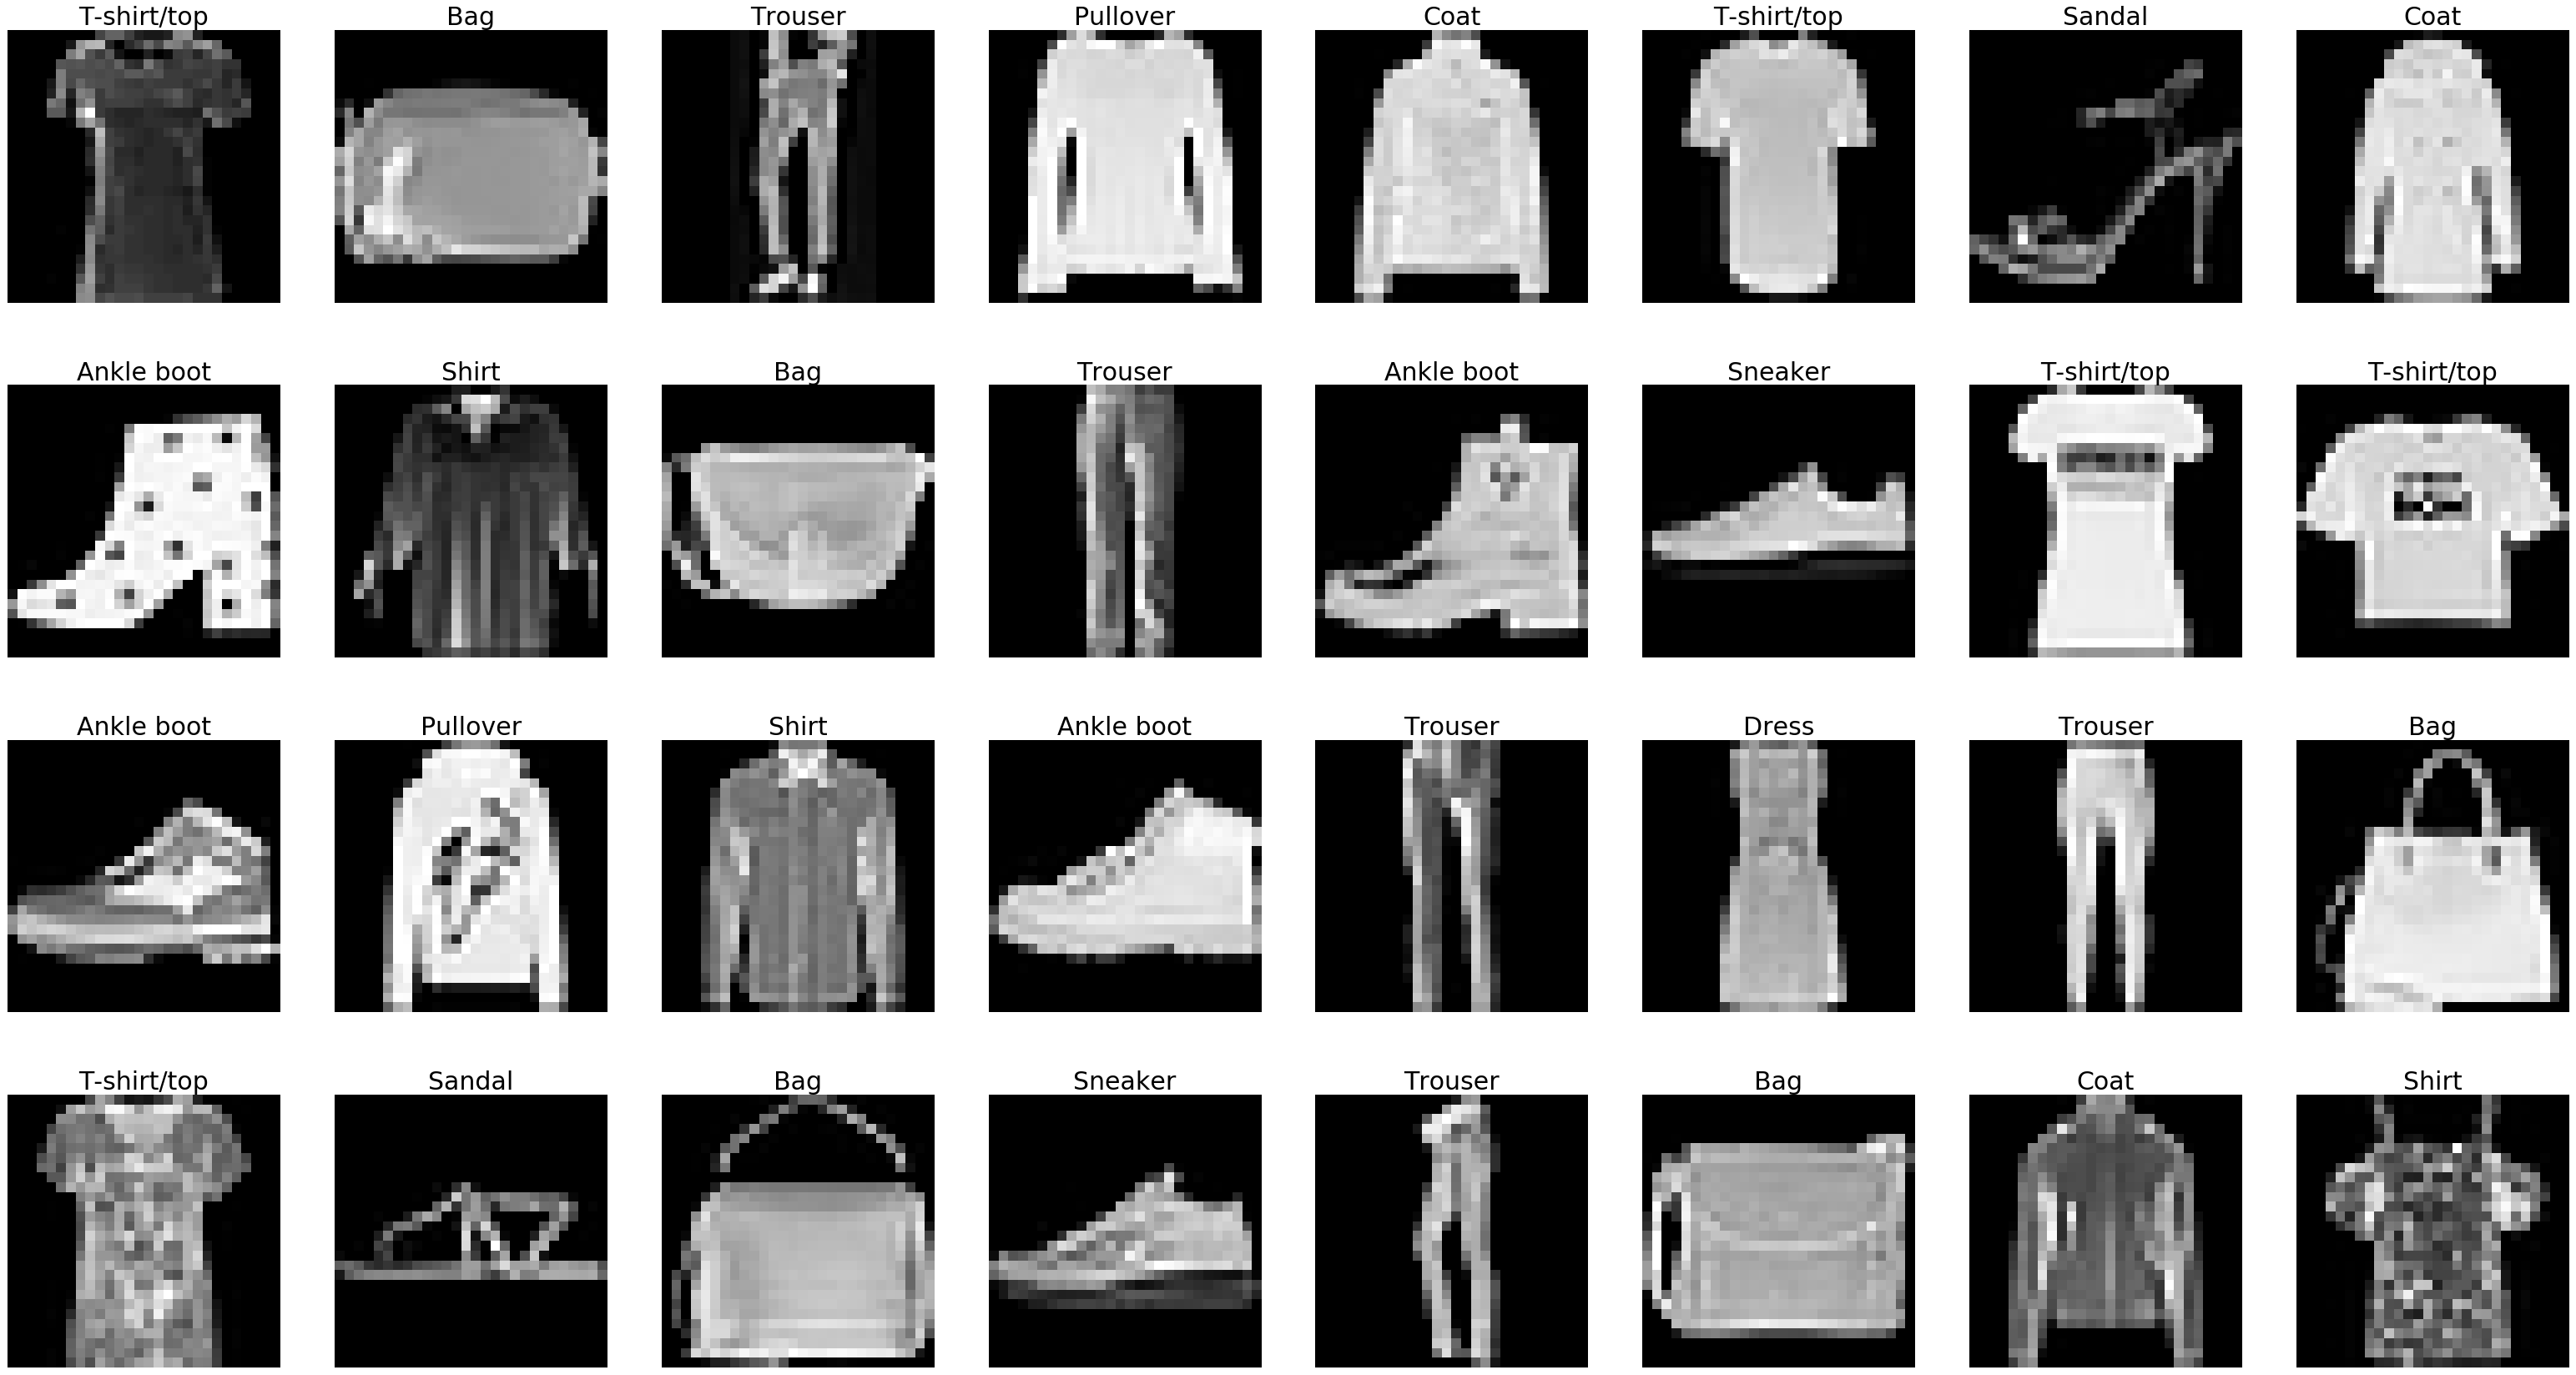

In [262]:
plt.figure(figsize = (55, 30))
for idx in range(batch_size):
    ax = plt.subplot(4, 8, idx + 1, xticks = [], yticks = [])
    display_img(ax, images[idx, :], classes[labels[idx].item()])

In [263]:
class Cnn_fashion_mnist(nn.Module):
    
    def __init__(self, hidden_i = 256, hidden_ii = 128, constant_weight = None):
        
        super(Cnn_fashion_mnist, self).__init__()

        self.hidden_layer_i = nn.Linear(784, hidden_i)

        self.hidden_layer_ii = nn.Linear(hidden_i, hidden_ii)

        self.output = nn.Linear(hidden_ii, 10)
        
        if constant_weight is not None:
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.constant_(m.weight, constant_weight)
                    nn.init.constant_(m.bias, 0)


    def forward(self, x):

        x = F.relu(self.hidden_layer_i(x))

        x = F.relu(self.hidden_layer_ii(x))

        x = self.output(x)
        
        return x

In [264]:
InteractiveShell.ast_node_interactivity = 'all'

In [265]:
model = Cnn_fashion_mnist()
model.to(gpu_device)

Cnn_fashion_mnist(
  (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [266]:
optimizer = optim.Adagrad(model.parameters(), lr = 0.01)
optimizer

Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.01
    lr_decay: 0
    weight_decay: 0
)

In [267]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

In [268]:
InteractiveShell.ast_node_interactivity = 'none'

In [269]:
epochs = 1

In [270]:
def training(model, train_loader, eval_loader, criterion, optimizer, epochs):
    
    gpu_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    
    for epoch in range(epochs):

        training_loss = 0.0
        eval_loss = 0.0

        model.train()
        for epoch_id, (images, labels) in enumerate(train_loader):
            images, labels = images.to(gpu_device), labels.to(gpu_device)
            images = images.view(batch_size, -1)

            optimizer.zero_grad()

            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            training_loss += loss.item() * batch_size
        else:
            with torch.no_grad():
                model.eval()

                for eval_batch_id, (images, labels) in enumerate(eval_loader):

                    images, labels = images.to(gpu_device), labels.to(gpu_device)
                    images = images.view(batch_size, -1)

                    output = model.forward(images)
                    loss = criterion(output, labels)

                    eval_loss += loss.item() * batch_size

        avg_training_loss = training_loss/len(train_loader)
        avg_eval_loss = eval_loss/len(eval_loader)

        print(
        "Epoch {} : Training Loss {:.5f} | Eval Loss {:.5f}".format(
            epoch + 1,
            avg_training_loss,
            avg_eval_loss
            )
        )

In [271]:
training(model, train_loader, eval_loader, criterion, optimizer, epochs)

Epoch 1 : Training Loss 15.87914 | Eval Loss 13.07265


In [272]:
def test_cycle(model, test_loader, batch_size):
    
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    cpu_device = 'cpu'
    
    with torch.no_grad():
        model.eval()

        test_iter = iter(test_loader)
        test_images, test_labels = next(test_iter)
        
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_images = test_images.view(batch_size, -1)

        output = model.forward(test_images)
        _, predicted_class = torch.max(input = output, dim = 1)

        test_images, test_labels = test_images.to(cpu_device), test_labels.to(cpu_device).numpy()
        predicted_class = predicted_class.to(cpu_device).numpy()

        equals = predicted_class == test_labels
        accuracy = np.mean(equals)

        print('Accuracy on Test Dataset {}'.format(accuracy))

In [273]:
test_cycle(model, test_loader, batch_size)

Accuracy on Test Dataset 0.78125


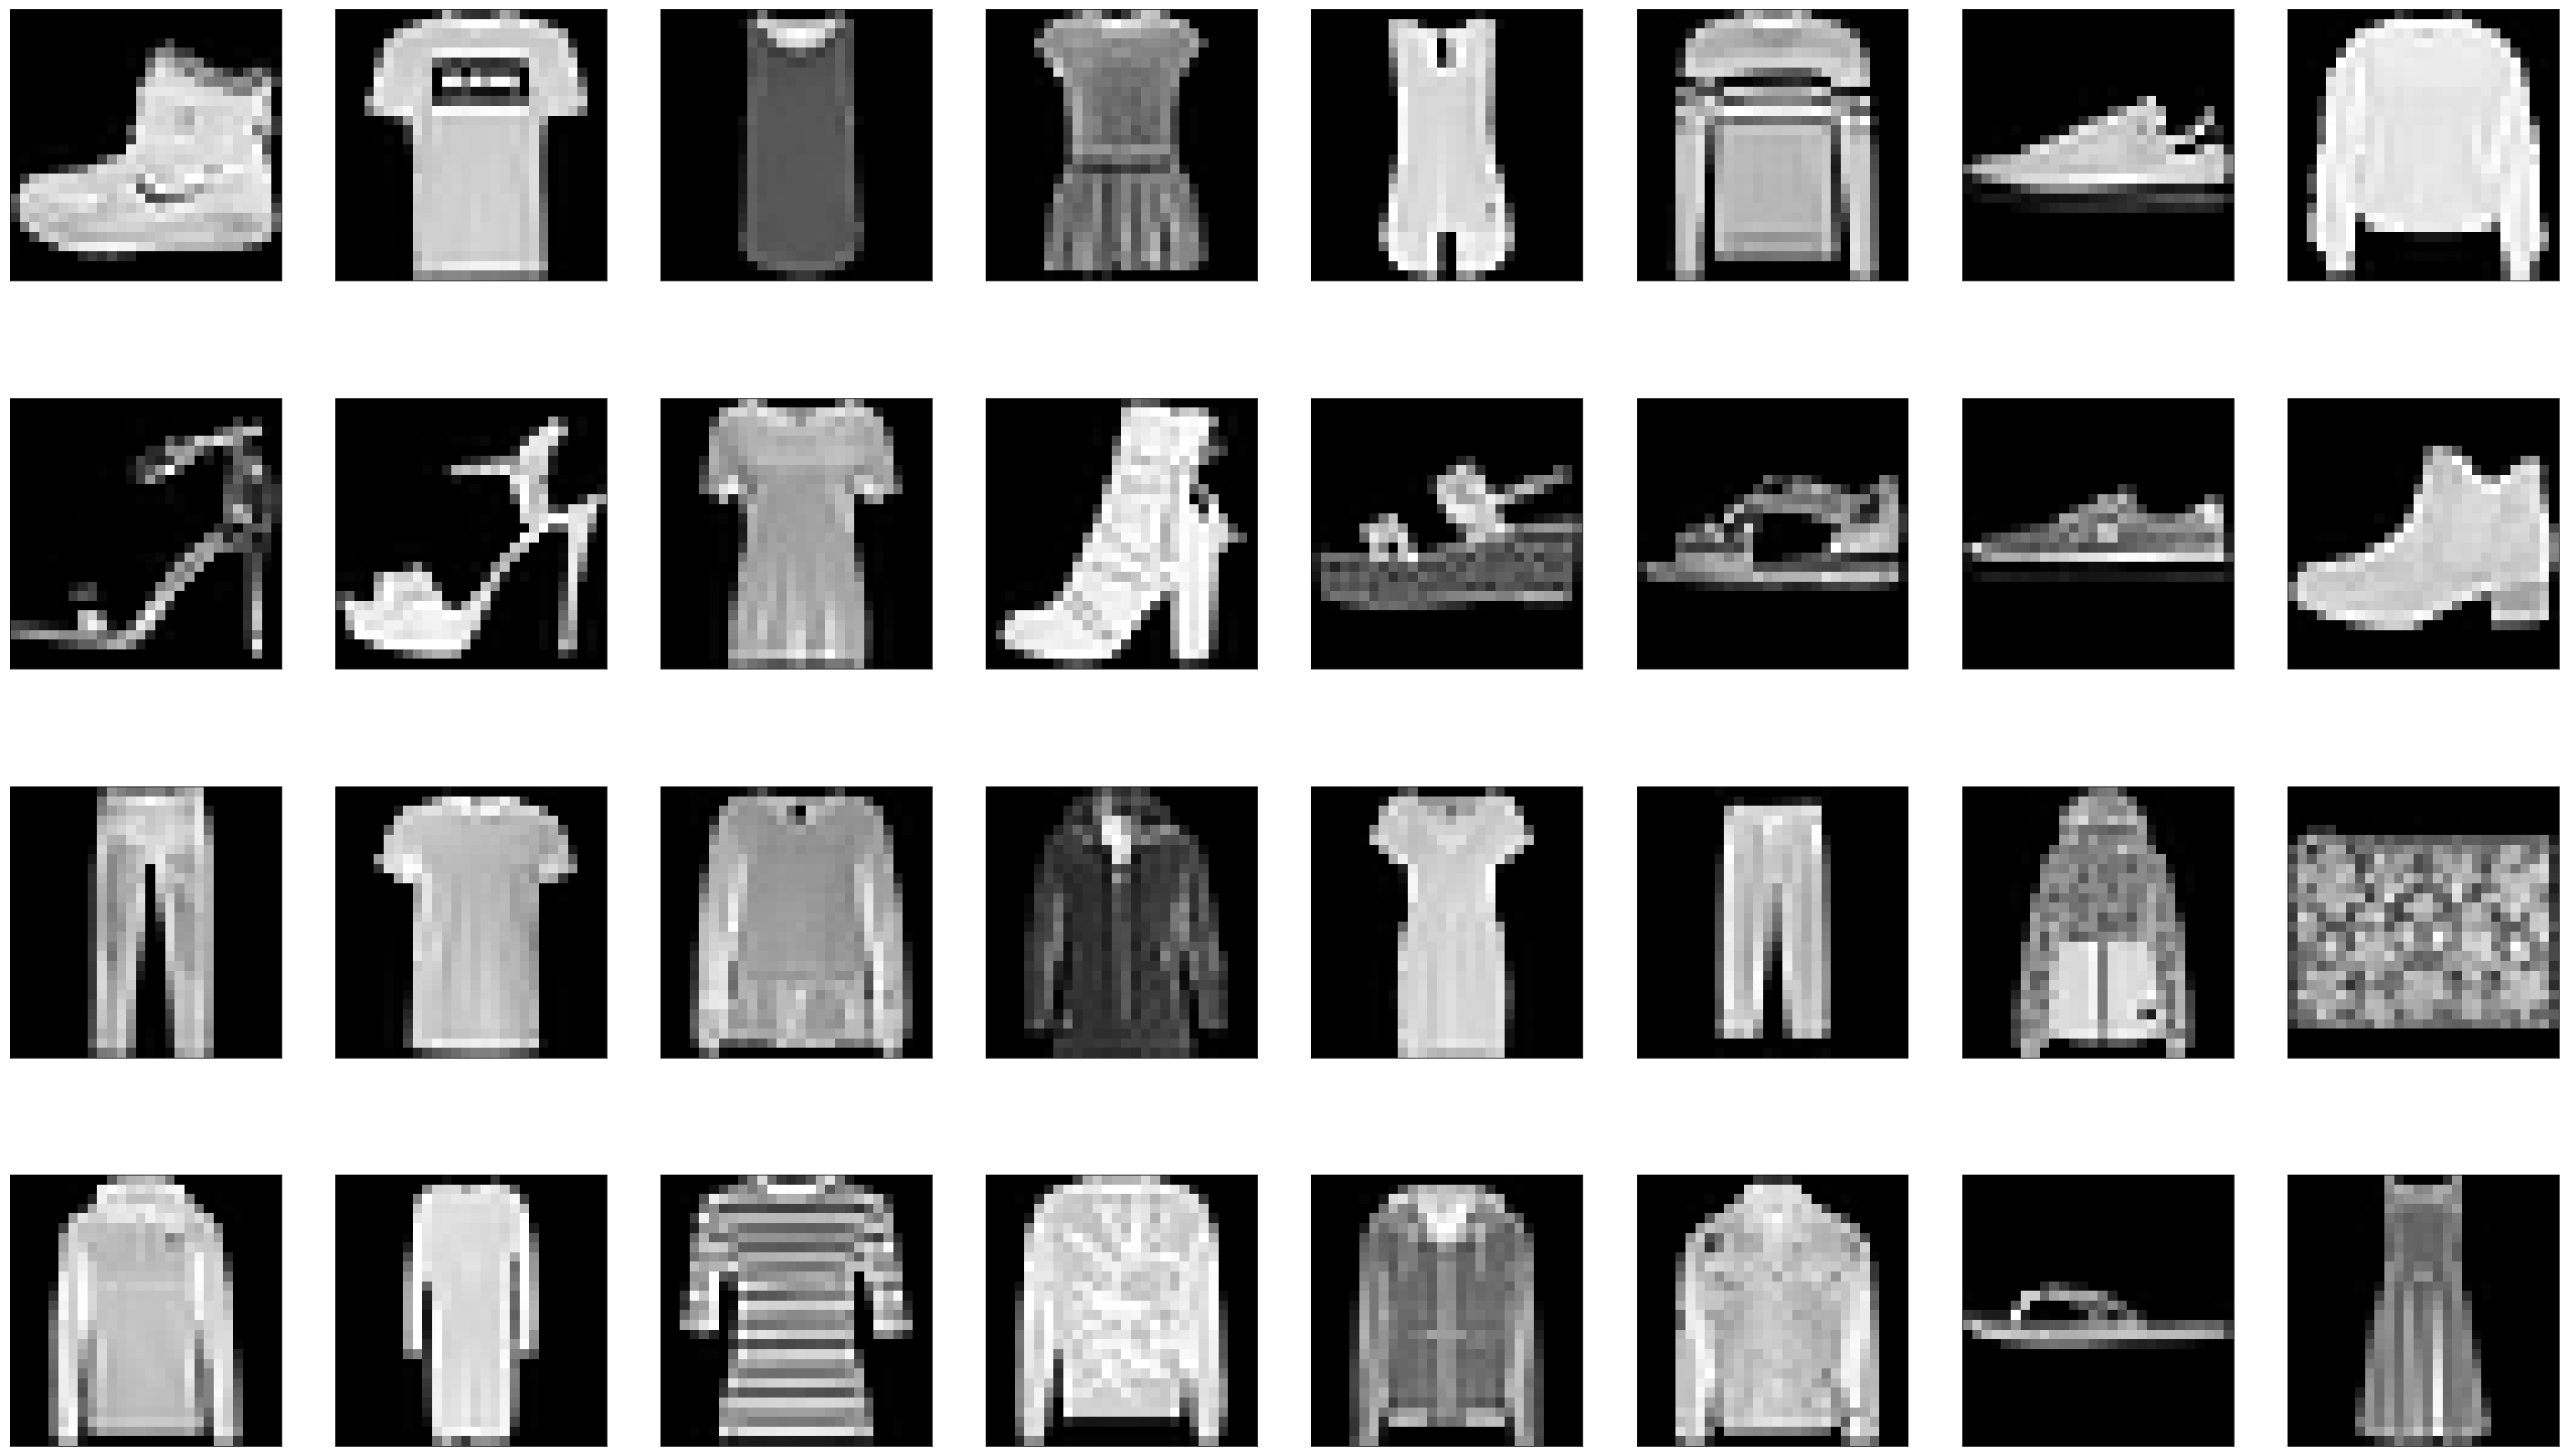

In [274]:
plt.figure(figsize = (50, 30))
for index in range(batch_size):
    
    ax = plt.subplot(4, 8, index + 1, xticks = [], yticks = [])
    img = test_images[index].view(28, 28).numpy()
    
    ax.imshow(img, cmap = 'gray')

In [275]:
InteractiveShell.ast_node_interactivity = 'all'

In [276]:
def _get_loss_acc(model,
                  train_loader,
                  test_loader,
                  batch_size,
                  epochs,
                  gpu_device,
                  cpu_device):
    
    model = model.to(gpu_device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(model.parameters(), lr = 0.01)

    loss_batch = []
    for epoch in range(epochs):

        model.train()
        for epoch_id, (images, labels) in enumerate(train_loader):

            images, labels = images.to(gpu_device), labels.to(gpu_device)
            images = images.view(batch_size, -1)

            optimizer.zero_grad()

            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            loss_batch.append(loss.item())
    else:
        
        equals = 0.0
        for idx, (images, labels) in enumerate(test_loader):

            images = images.to(gpu_device)
            images = images.view(batch_size, -1)

            output = model(images)
            _, predicted_output = torch.max(output, 1)

            predicted_output, labels = predicted_output.to(cpu_device), labels.to(cpu_device)
            equals += (predicted_output == labels).sum()
        else:
            accuracy = equals/len(test_loader)
    
    return loss_batch, accuracy

In [277]:
def compare_init_weights(model_list,
                         train_loader,
                         test_loader,
                         batch_size,
                         epochs,
                         gpu_device,
                         cpu_device,
                         plot_n_batches = 100):
    
    colors = ['r', 'g', 'b', 'c', 'y', 'k']
    label_acc = []
    label_loss = []
    
    for idx, (model, label) in enumerate(model_list):
        loss, acc = _get_loss_acc(model,
                                             train_loader,
                                             test_loader,
                                             batch_size,
                                             epochs,
                                             gpu_device,
                                             cpu_device)
        
        plt.plot(loss[:plot_n_batches], colors[idx], label = label)
        label_acc.append((label, acc))
        label_loss.append((label, loss[-1]))
    
    return True


In [278]:
model_0 = Cnn_fashion_mnist(constant_weight = 0)
model_0

Cnn_fashion_mnist(
  (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [279]:
model_1 = Cnn_fashion_mnist(constant_weight = 1)
model_1

Cnn_fashion_mnist(
  (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [280]:
model_list = [(model_0, 'Model with Zero Weight'),
             (model_1, 'Model with ones Weight')]
model_list

[(Cnn_fashion_mnist(
    (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
    (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
    (output): Linear(in_features=128, out_features=10, bias=True)
  ), 'Model with Zero Weight'), (Cnn_fashion_mnist(
    (hidden_layer_i): Linear(in_features=784, out_features=256, bias=True)
    (hidden_layer_ii): Linear(in_features=256, out_features=128, bias=True)
    (output): Linear(in_features=128, out_features=10, bias=True)
  ), 'Model with ones Weight')]

True

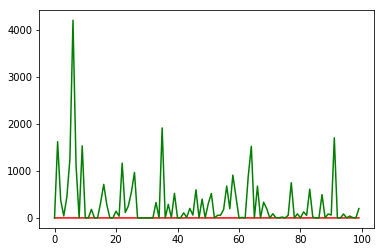

In [281]:
compare_init_weights(model_list, train_loader, test_loader, batch_size, 1, gpu_device, cpu_device)